# Data Analysis with Pandas

### Authors

###### Noemi Benci
###### Federico Pirona 
---------

## Introduction
This analysis focuses on the spread of SARS-CoV-2 in Italy. 
Data are downloaded from these repositories on GitHub
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-regioni.json (Data for regions)
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-province.json (Data for province)

The data are daily updates of Coronavirus cases from February, 24 2020 provided by the Depatment of the Civil Protection. These updates have been uploaded on GitHub by Roberto Polli (https://github.com/ioggstream) and Umberto Rosini (https://github.com/umbros) every day.

Data regards some day-by-day counts about the amount of infected, of deaths, of recovered and other conditions.
It has a natural tree structure because for each region there are one or more provinces and each pair region-province is recorded daily. 

The analysis starts visualizing the variables and the structures of the two datasets. 
Then we show some useful graphical representations of the data. After that we provide some data manipulation to get data more handle. We add data about the number of inhabitants of each province.
We combine together the two datasets and use a hierarchical indexing to make the dataset more readable.
Then we use an italian map to represent the number of cases and hospitalized by province. 
Then we provide some pivot-tables underlining some interesting relation between variables.
At the end we build a new DataFrame made of Time-Series for the number of daily cases by province and we make other graphical representation with it.

-----------

## Loading data

In [231]:
import json                                           # to open file json
import pandas as pd                                   # to manage data
import numpy as np                                    # to create array
import matplotlib
import matplotlib.pyplot as plt                       # to make plots
from datetime import date, datetime                   # to convert strings in dates
import seaborn as sns                                 # library for nicer plots
sns.set()
%matplotlib inline

In [321]:
with open('./Data/dpc-covid19-ita-province.json') as f:
    d1 = json.load(f)

In [233]:
with open('./Data/dpc-covid19-ita-regioni.json') as f:
    d2 = json.load(f)

### Visualize data as dictionary

In [235]:
d1[:1]

[{'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 69,
  'denominazione_provincia': 'Chieti',
  'sigla_provincia': 'CH',
  'lat': 42.35103167,
  'long': 14.16754574,
  'totale_casi': 0,
  'note_it': '',
  'note_en': ''}]

In [236]:
d2[:1]

[{'data': '2020-02-24T18:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'lat': 42.35122196,
  'long': 13.39843823,
  'ricoverati_con_sintomi': 0,
  'terapia_intensiva': 0,
  'totale_ospedalizzati': 0,
  'isolamento_domiciliare': 0,
  'totale_positivi': 0,
  'variazione_totale_positivi': 0,
  'nuovi_positivi': 0,
  'dimessi_guariti': 0,
  'deceduti': 0,
  'totale_casi': 0,
  'tamponi': 5,
  'casi_testati': None,
  'note_it': '',
  'note_en': ''}]

### Visualize data as Pandas DataFrames

In [237]:
province = pd.DataFrame(d1)
province.sample(5)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
10439,2020-05-15T17:00:00,ITA,1,Piemonte,5,Asti,AT,44.899129,8.204143,1723,,
6900,2020-04-17T17:00:00,ITA,10,Umbria,55,Terni,TR,42.560713,12.646688,322,,
10730,2020-05-17T17:00:00,ITA,9,Toscana,46,Lucca,LU,43.844323,10.501514,1348,,
10516,2020-05-16T17:00:00,ITA,15,Campania,65,Salerno,SA,40.678220,14.759403,672,,
5054,2020-04-03T17:00:00,ITA,11,Marche,44,Ascoli Piceno,AP,42.853223,13.576911,232,,


In [238]:
region = pd.DataFrame(d2)
region.sample(5)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
1748,2020-05-17T17:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,721,111,832,4824,5656,-196,50,17603,3973,27232,261106,163117.0,,
545,2020-03-20T17:00:00,ITA,5,Veneto,45.434905,12.338452,843,236,1079,2598,3677,508,547,223,131,4031,49288,NaN,,
2350,2020-06-14T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,7,0,7,0,7,0,0,1040,144,1191,16597,12806.0,,
946,2020-04-09T17:00:00,ITA,17,Basilicata,40.639471,15.805148,50,17,67,208,275,5,6,13,15,303,3474,NaN,,
953,2020-04-09T17:00:00,ITA,7,Liguria,44.411493,8.932699,1103,154,1257,1996,3253,8,114,1085,682,5020,18446,NaN,,


-----------
## First look to 'Province' Dataset
Let's discover some info about the available variables and their nature.

In [239]:
province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15104 entries, 0 to 15103
Data columns (total 12 columns):
data                       15104 non-null object
stato                      15104 non-null object
codice_regione             15104 non-null int64
denominazione_regione      15104 non-null object
codice_provincia           15104 non-null int64
denominazione_provincia    15104 non-null object
sigla_provincia            15104 non-null object
lat                        15104 non-null float64
long                       15104 non-null float64
totale_casi                15104 non-null int64
note_it                    15104 non-null object
note_en                    15104 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 1.4+ MB


In [240]:
province.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione',
       'codice_provincia', 'denominazione_provincia', 'sigla_provincia', 'lat',
       'long', 'totale_casi', 'note_it', 'note_en'],
      dtype='object')

In [241]:
province.describe(include='all')

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
count,15104,15104,15104.000000,15104,15104.000000,15104,15104,15104.000000,15104.000000,15104.000000,15104,15104
unique,118,1,NaN,21,NaN,108,108,NaN,NaN,NaN,6,6
top,2020-03-05T17:00:00,ITA,NaN,Lombardia,NaN,In fase di definizione/aggiornamento,,NaN,NaN,NaN,,
freq,128,15104,NaN,1534,NaN,2478,2478,NaN,NaN,NaN,15099,15099
mean,NaN,NaN,10.687500,NaN,207.523438,NaN,NaN,35.868843,10.112000,1176.851298,NaN,NaN
std,NaN,NaN,6.127435,NaN,347.394528,NaN,NaN,16.072056,5.097761,2433.513404,NaN,NaN
min,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,5.750000,NaN,32.750000,NaN,NaN,38.848542,8.583304,38.000000,NaN,NaN
50%,NaN,NaN,10.000000,NaN,64.500000,NaN,NaN,42.609815,11.188560,348.000000,NaN,NaN
75%,NaN,NaN,16.000000,NaN,96.250000,NaN,NaN,44.947714,13.593962,1152.000000,NaN,NaN


The dataset of provinces is composed by 15 104 observations each composed by 12 variables. Each observation is a daily update of the count of cases of Coronavirus for a particular italian city and it provides all the information about the city (geographical location with longitude and latitude, which region does the city belongs to and so on) and the number of cases registred on a particular date. 

The dataset contains information of 118 different days for every region (21 unique regions) and province (107 provinces + 1 'In fase di aggiornamento') of Italy. 

##### Note that the latitude and the longitude reach as minimum 0. The rows with latitude and/or longitude have to be removed because wrong (each italian city has latitude and longitude different from 0).

In [242]:
province.shape

(15104, 12)

In [243]:
# Verify that the rows with lat=0 have also long=0
(province[province['lat']==0] == province[province['long']==0]).sum()

data                       2478
stato                      2478
codice_regione             2478
denominazione_regione      2478
codice_provincia           2478
denominazione_provincia    2478
sigla_provincia            2478
lat                        2478
long                       2478
totale_casi                2478
note_it                    2478
note_en                    2478
dtype: int64

In [244]:
# before there were 15104 observation of which 2478 were fake. Dropping the fake one we should have 
province.shape[0] - province[province['long']==0].shape[0]

12626

In [245]:
# same rows with lat=0 and long=0, let's exclude them
province = province.drop(province[province['lat']==0].index)

# let's verify the shape of the clean dataset
province.shape

(12626, 12)

-----------
## First look to 'Regions' Dataset

In [246]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 20 columns):
data                          2478 non-null object
stato                         2478 non-null object
codice_regione                2478 non-null int64
denominazione_regione         2478 non-null object
lat                           2478 non-null float64
long                          2478 non-null float64
ricoverati_con_sintomi        2478 non-null int64
terapia_intensiva             2478 non-null int64
totale_ospedalizzati          2478 non-null int64
isolamento_domiciliare        2478 non-null int64
totale_positivi               2478 non-null int64
variazione_totale_positivi    2478 non-null int64
nuovi_positivi                2478 non-null int64
dimessi_guariti               2478 non-null int64
deceduti                      2478 non-null int64
totale_casi                   2478 non-null int64
tamponi                       2478 non-null int64
casi_testati                  1323 n

We can see that 'casi_testati' has many null values (1155 null values).

In [247]:
# the null values refer to dates from the beginning to April, 18 2020.
# (The first non-Null value is referred to April, 19 2020)
import math
i = 0
while math.isnan(region['casi_testati'][i]):
    i += 1
print('last nan', region['data'][i-1])
print('new day', region['data'][i])

last nan 2020-04-18T17:00:00
new day 2020-04-19T17:00:00


Indeed data for this variable are available since 19-04-2020. Before this date, the number of tested people isn't added to the DataFrame.

In [248]:
region.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'note_it',
       'note_en'],
      dtype='object')

In [249]:
region.describe(include='all')

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
count,2478,2478,2478.000000,2478,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.00000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,1323.000000,2478,2478
unique,118,1,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,49
top,2020-03-01T17:00:00,ITA,NaN,Calabria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
freq,21,2478,NaN,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2430,2430
mean,NaN,NaN,11.857143,NaN,43.046293,12.225955,648.023002,74.105327,722.128329,2031.019370,2753.14770,8.470944,96.315174,3445.033495,975.100081,7173.281275,89287.742131,96127.302343,NaN,NaN
std,NaN,NaN,6.275065,NaN,2.489283,2.659484,1586.464835,167.399890,1747.580746,4136.511892,5608.91852,224.406621,240.287082,7969.149307,2615.799905,14929.226778,145630.765996,98890.620593,NaN,NaN
min,NaN,NaN,1.000000,NaN,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.00000,-5339.000000,-229.000000,0.000000,0.000000,0.000000,0.000000,3482.000000,NaN,NaN
25%,NaN,NaN,7.000000,NaN,41.125596,11.121231,26.000000,2.000000,32.000000,97.000000,142.25000,-26.000000,2.000000,33.000000,24.000000,436.000000,5626.750000,31178.000000,NaN,NaN
50%,NaN,NaN,12.000000,NaN,43.616760,12.388247,122.000000,17.000000,140.000000,601.500000,786.00000,0.000000,15.000000,745.000000,194.500000,2450.000000,34797.500000,58383.000000,NaN,NaN
75%,NaN,NaN,17.000000,NaN,45.434905,13.768136,518.750000,69.750000,585.500000,1882.000000,2612.25000,30.000000,79.000000,2620.000000,565.000000,6162.750000,102077.500000,127865.000000,NaN,NaN


The dataset of Regions contains 2478 rows and 20 variables each. Every observation is an update of some numbers about the spread of Coronavirus in Italy. 
For 118 days and for all italian regions we have:
- number of hospitalized with sympthoms  (on average 648 per day, with minimum 0 and maximum of about 12 100);
- number of people in intensive care unit (on average 74 per day, with minimum 0 and maximum of about 1 400);
- number of hospitalized (on average 722 per day, with minimum 0 and maximum 13 300);
- number of people house-isolated (on average 2 031 per day, with minimum 0 and maximum of about 30 400);
- number of tested positive  (on average 2 753 per day, with minimum 0 and maximum of about 37 300);
- variation of new tested positive (on average 8.5 per day, with minimum 0 and maximum of about 1 950);
- number of new tested positive (on average 96 per day, with minimum 0 and maximum of about 3 250);
- number discharged healed;
- number of deaths;
- number of total cases;
- number of swabs*;
- number of tested cases.

For the last five variables it doesn't make sense to interpret the descriptives, because they are not daily counts but cumulative. We found out it because the mean values are very high for daily counts and we proved it by reading at the formal description of variables in https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md.

This dataset can be integrated with the province dataset to add the information about the number of cases within the cities of a region.

*For further analysis we will use number of swabs even if it could be better to use number of tested cases because this latter variable has many missing values.

-------------
## Some Graphical Representations

First it is necessary to trasform the date in a 'datetime' object.

In [250]:
# check the date format
display(region['data'][0], province['data'][0])   

'2020-02-24T18:00:00'

'2020-02-24T18:00:00'

In [251]:
display(region['data'].unique()[region['data'].unique() != province['data'].unique()],
        province['data'].unique()[region['data'].unique() != province['data'].unique()])

array(['2020-03-02T18:00:00', '2020-03-03T18:00:00',
       '2020-03-06T17:00:00'], dtype=object)

array(['2020-03-02T17:00:00', '2020-03-03T17:00:00',
       '2020-03-06T18:00:00'], dtype=object)

Dates are equal for regions and provinces, apart from three dates for which we have different hours.

In [252]:
# add new date as datetime object taking only the date and excluding hours

# long and expensive version
region['data'] = [datetime.strptime(x, "%Y-%m-%dT%H:%M:%S").date() for x in region['data']] 

# short and cheap version 
province['data'] = pd.to_datetime(province['data']).dt.date

In [253]:
display(region['data'].head(), province['data'].head())

0    2020-02-24
1    2020-02-24
2    2020-02-24
3    2020-02-24
4    2020-02-24
Name: data, dtype: object

0    2020-02-24
1    2020-02-24
2    2020-02-24
3    2020-02-24
5    2020-02-24
Name: data, dtype: object

### Number of total cases and deaths during the time

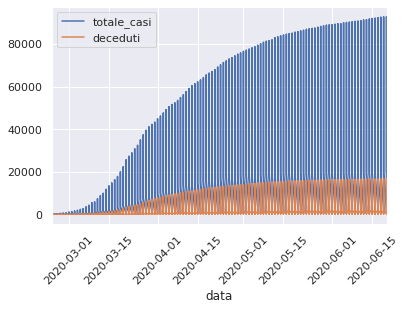

In [254]:
region.plot(y=['totale_casi', 'deceduti'], x='data', rot=45);  

From the plot we see that the number of people infected by the Covid-19 has increased very rapidly in the first month (from the 1st of March to the first of April) and that it has continued increasing quite rapidely. The number of deaths has increased in the first two months but now it seems quite constant.

### Time series of the counts by region

In [255]:
regions_names = region['denominazione_regione'].unique() 

# define the figure size and grid layout properties
figsize = (20, 40)
cols = 2
rows = len(regions_names) // cols + 1

def trim_axs(axs, N):
    """ Reduce *axs* to *N* Axes. 
    All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

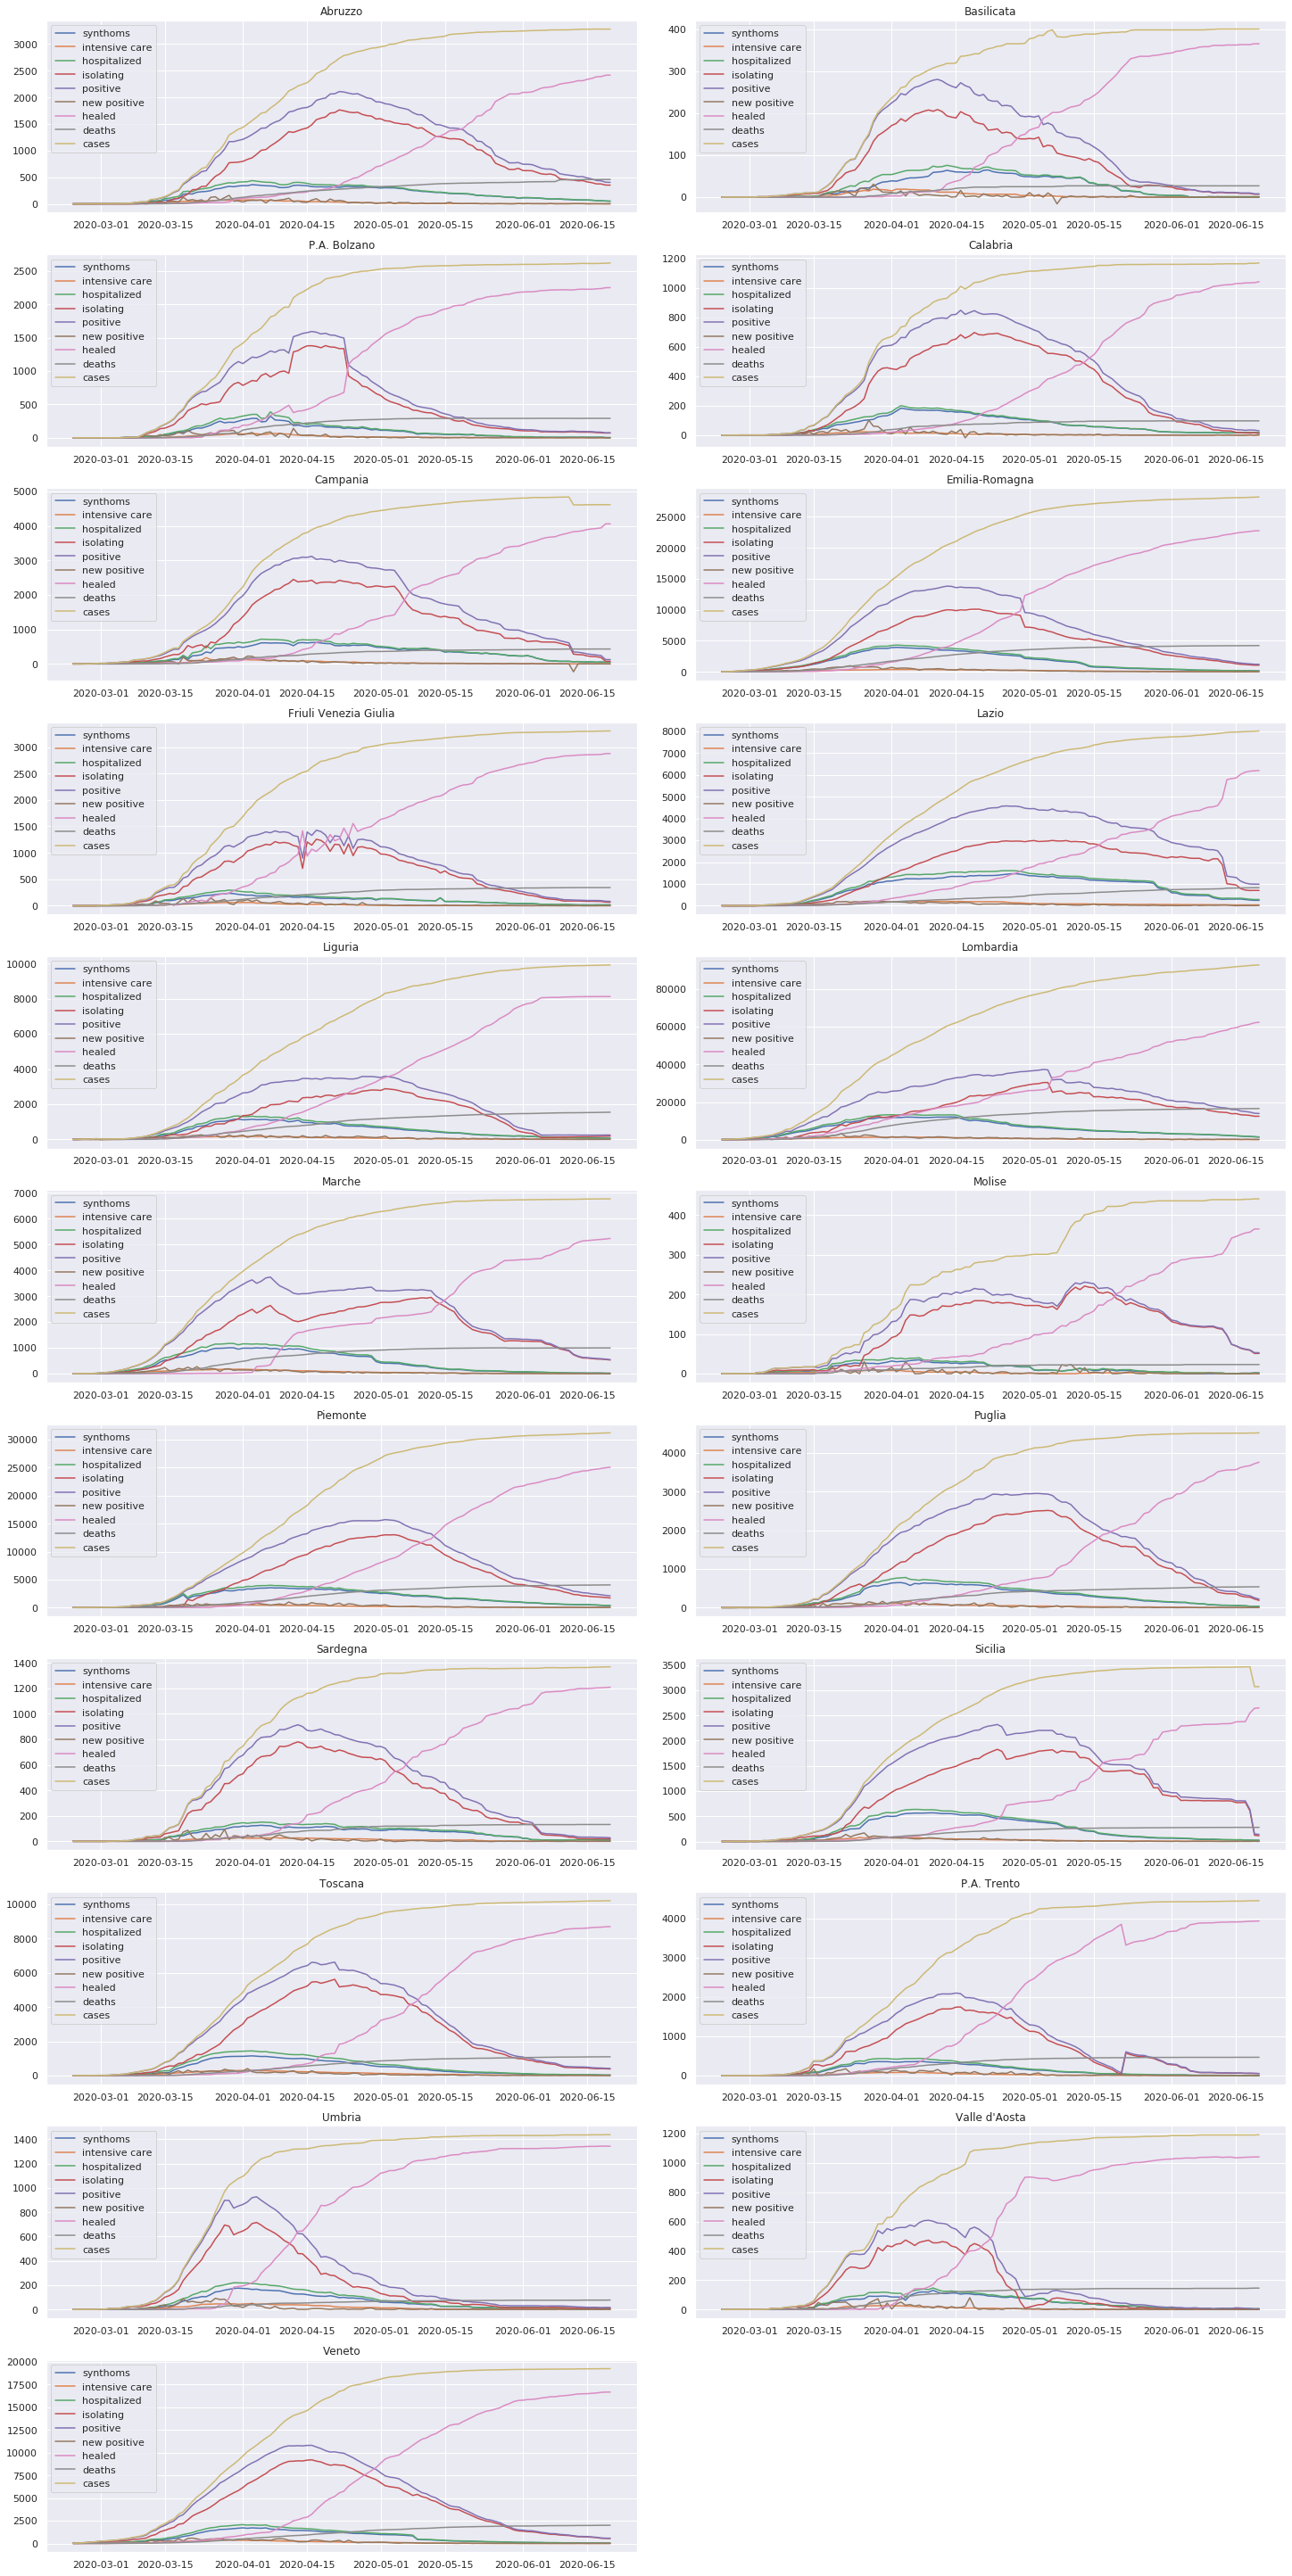

In [256]:
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, len(regions_names))
for ax, reg in zip(axs, regions_names):
    ax.set_title(str(reg))
    df_r = region[region['denominazione_regione']==reg]
    ax.plot(df_r['data'], df_r['ricoverati_con_sintomi'], label='synthoms')
    ax.plot(df_r['data'], df_r['terapia_intensiva'], label='intensive care')     
    ax.plot(df_r['data'], df_r['totale_ospedalizzati'], label='hospitalized')   
    ax.plot(df_r['data'], df_r['isolamento_domiciliare'], label='isolating')
    ax.plot(df_r['data'], df_r['totale_positivi'], label='positive')
    ax.plot(df_r['data'], df_r['nuovi_positivi'], label='new positive')
    ax.plot(df_r['data'], df_r['dimessi_guariti'], label='healed')
    ax.plot(df_r['data'], df_r['deceduti'], label='deaths')
    ax.plot(df_r['data'], df_r['totale_casi'], label='cases') 
    ax.legend()

As we can see the values are very different between regions. Lombardy has very high values for quite all the counts evaluated. 
From the plots we can say that the regions in which we find higher values (apart from Lombardy) are Veneto, Piedmont and Emilia-Romagna.

Some variables are cumulative, for instance in the plot 'total cases', 'healed' and 'deaths' always grow. It can be useful to trasform these cumulative values into frequencies.

##### Creating new daily variables for the cumulative ones 

In [257]:
cols = ['dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi', 'casi_testati']

dailyincr = pd.DataFrame(region[['dimessi_guariti', 'deceduti', 'totale_casi', 
                                 'tamponi', 'casi_testati']], index=region.index, columns = cols)
n = len(region.denominazione_regione.unique())
for var in cols:
    for j in range(n):
        for i in range(j, dailyincr.shape[0]-n, n):
            if i <= n:
                dailyincr[var].values[i] = region[var].values[i] 
            else:
                dailyincr[var].values[i] = region[var].values[i] - region[var].values[i-n]
dailyincr.describe()

,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
count,2478.000000,2478.000000,2478.000000,2478.000000,1302.000000
mean,147.037934,27.914044,192.205811,3968.092413,3893.358679
std,1511.891517,360.670478,2131.400716,31404.683844,24866.184717
min,-531.000000,-11.000000,-394.000000,-2001.000000,-17122.000000
25%,1.000000,0.000000,2.000000,308.500000,519.250000
50%,14.000000,2.000000,16.000000,1070.000000,991.000000
75%,68.000000,10.000000,81.000000,2580.000000,2257.750000
max,62372.000000,16557.000000,92840.000000,949134.000000,565933.000000


In the summary of this new data, we can see that some values are negative. This is an error, in fact they are cumulative variables and their frequencies must be positive. Let's see if they are actually errors. 

In [258]:
dailyincr.describe(percentiles=[0.001, 0.005, 0.01, 0.05])

,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
count,2478.000000,2478.000000,2478.000000,2478.000000,1302.000000
mean,147.037934,27.914044,192.205811,3968.092413,3893.358679
std,1511.891517,360.670478,2131.400716,31404.683844,24866.184717
min,-531.000000,-11.000000,-394.000000,-2001.000000,-17122.000000
0.1%,-157.276000,-1.000000,-17.523000,-257.793000,-8163.189000
0.5%,-5.000000,0.000000,-1.000000,0.000000,-51.315000
1%,-1.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,1.000000,131.050000
50%,14.000000,2.000000,16.000000,1070.000000,991.000000
max,62372.000000,16557.000000,92840.000000,949134.000000,565933.000000


All the variables have only few negative values (under the first percentile), so we can hypothesize that they are actually errors. 
We can choose to replace all negative values with 0. 

In order to correct these errors we can add few lines in the previous code. We change both 'region' and 'dailyincr' at the same time. 

In [259]:
cols = ['dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi', 'casi_testati']
dailyincr = pd.DataFrame(region[['dimessi_guariti', 'deceduti', 'totale_casi', 
                                 'tamponi', 'casi_testati']], index=region.index, columns = cols)

n = len(region.denominazione_regione.unique())
for var in cols:
    for j in range(n):
        for i in range(j, dailyincr.shape[0], n):
            if i < n:
                dailyincr[var].values[i] = region[var].values[i] 
            else:
                diff = region[var].values[i] - region[var].values[i-n]
                if diff < 0:                                            # this 'if' checks for errors:
                    region.loc[i, var] = region.loc[i-n, var]           # some frequency of the cumulative 
                    dailyincr[var].values[i] = 0                        # variables resulted negative
                else:                                                   
                    dailyincr[var].values[i] = diff
dailyincr.describe()

,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
count,2478.000000,2478.000000,2478.000000,2478.000000,1302.000000
mean,73.629540,13.968119,96.404762,1995.086764,1598.970046
std,201.776911,43.864862,240.205617,2743.172782,2335.900007
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,304.000000,492.750000
50%,12.000000,2.000000,15.000000,1066.500000,971.000000
75%,62.000000,9.000000,79.000000,2503.000000,2162.500000
max,5881.000000,546.000000,3251.000000,20630.000000,60247.000000


In [260]:
dailyincr.sample(5)

,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
1286,357,44,239,5378,3133.0
1464,8,2,27,1603,819.0
2367,32,1,1,889,749.0
311,0,0,10,39,NaN
913,46,18,96,700,NaN


***Finally we merge 'dailyincr' to 'regions' using the 'join' function.***

In [261]:
region = region.join(dailyincr, rsuffix='_daily')
region.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,totale_casi,tamponi,casi_testati,note_it,note_en,dimessi_guariti_daily,deceduti_daily,totale_casi_daily,tamponi_daily,casi_testati_daily
0,2020-02-24,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,5,NaN,,,0,0,0,5,NaN
1,2020-02-24,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,NaN,,,0,0,0,0,NaN
2,2020-02-24,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,...,0,1,NaN,,,0,0,0,1,NaN
3,2020-02-24,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,1,NaN,,,0,0,0,1,NaN
4,2020-02-24,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,10,NaN,,,0,0,0,10,NaN


We repeat the same code for the province dataset.

In [262]:
col = 'totale_casi'
dailyincr_prov = pd.DataFrame(province['totale_casi'], index=province.index)

n = len(province.sigla_provincia.unique())

for j in range(n):
    for i in range(j, len(province.index), n):
        if i < n:
            dailyincr_prov[col].values[i] = province[col].values[i] 
        else:
            diff = province[col].values[i] - province[col].values[i-n]
            if diff < 0:                                                  # this 'if' checks for errors:
                province[col].values[i] = province[col].values[i-n]       # some frequency of the cumulative 
                dailyincr_prov[col].values[i] = 0                         # variables resulted negative
            else:                                                   
                dailyincr_prov[col].values[i] = diff

dailyincr_prov.describe()


,totale_casi
count,12626.000000
mean,18.653334
std,47.846338
min,0.000000
25%,0.000000
50%,3.000000
75%,16.000000
max,868.000000


In [263]:
province = province.join(dailyincr_prov, rsuffix='_daily')
province.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en,totale_casi_daily
0,2020-02-24,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,,0
1,2020-02-24,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,,0
2,2020-02-24,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,,0
3,2020-02-24,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,,0
5,2020-02-24,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,0,,,0


#### Add number of inhabitants

We add population data by provinces from Istat (January, 1, 2019) from this link http://dati.istat.it/Index.aspx?DataSetCode=DCIS_POPRES1.

In [322]:
# read the dataset
pop = pd.read_csv('./Data/population.csv')
pop.head()

,Provincia,Reg,Popolazione
0,RM\nCittà Metropolitana di\nROMA CAPITALE,LAZ,4.342.212
1,MI\nCittà Metropolitana di\nMILANO,LOM,3.250.315
2,NA\nCittà Metropolitana di\nNAPOLI,CAM,3.084.890
3,TO\nCittà Metropolitana di\nTORINO,PIE,2.259.523
4,BS\nBrescia,LOM,1.265.954


In [265]:
# frist look to the variables
pop.describe(include='all')

,Provincia,Reg,Popolazione
count,107,107,107
unique,107,21,107
top,CB\nCampobasso,LOM,358.955
freq,1,12,1


The values of the number of inhabitants (variable 'Popolazione') is seen as a string so it has to be converted removing the dots into the values.

In [266]:
popolazione = []
for p in pop['Popolazione']:
    popolazione.append(int(p.replace('.', ''))) # we remove the dots
pop['Popolazione'] = popolazione                # we replace the values

In [267]:
pop.describe()

,Popolazione
count,1.070000e+02
mean,5.641079e+05
std,6.166203e+05
min,8.437900e+04
25%,2.463265e+05
50%,3.878760e+05
75%,6.106935e+05
max,4.342212e+06


##### Add population information to the dataset 'province'

In [268]:
# the variable 'Provincia' has a different notation so it's necessary to change it so that we can use it 
# in particular we select only the first two letters that refer to the initial of the province
prov = []
for i in pop.index:
    prov.append(pop.Provincia[i][:2])

In [269]:
# we create a dataframe with the initial of the province and its population density
df_pop_prov = pd.DataFrame({'Popolazione': pop.Popolazione, 'sigla_provincia': prov}, columns=['sigla_provincia', 'Popolazione'])
df_pop_prov.head()

,sigla_provincia,Popolazione
0,RM,4342212
1,MI,3250315
2,NA,3084890
3,TO,2259523
4,BS,1265954


We merge this table to the province dataset.

In [270]:
province_pop = pd.merge(province, df_pop_prov, on='sigla_provincia')
province_pop.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en,totale_casi_daily,Popolazione
0,2020-02-24,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,,0,385588
1,2020-02-25,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,,0,385588
2,2020-02-26,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,,0,385588
3,2020-02-27,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,,0,385588
4,2020-02-28,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,,0,385588


##### Add population information to the dataset 'region'

In [271]:
# we create a dataset with the initial of regions and its population density
df_pop_reg =  pd.DataFrame(pop.groupby('Reg')['Popolazione'].sum().reset_index())
df_pop_reg

,Reg,Popolazione
0,ABR,1311580
1,BAS,562869
2,BOL,531178
3,CAL,1947131
4,CAM,5801692
5,EMR,4459477
6,FVG,1215220
7,LAZ,5879082
8,LIG,1550644
9,LOM,10060574


It is necessary to link the abbrevation of regions to its full name to add the population information to the region dataset.

In [272]:
abbrv = df_pop_reg.Reg.unique() 
abbrv

array(['ABR', 'BAS', 'BOL', 'CAL', 'CAM', 'EMR', 'FVG', 'LAZ', 'LIG',
       'LOM', 'MAR', 'MOL', 'PIE', 'PUG', 'SAR', 'SIC', 'TOS', 'TRE',
       'UMB', 'VDA', 'VEN'], dtype=object)

In [273]:
reg_name = region['denominazione_regione'].unique()
reg_name

array(['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania',
       'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
       'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [274]:
# we create a dictionary to link the abbrevation to the full name
reg_abbrv = {abbrv[j]:reg_name[j] for j in range(len(abbrv))}
reg_abbrv

{'ABR': 'Abruzzo',
 'BAS': 'Basilicata',
 'BOL': 'P.A. Bolzano',
 'CAL': 'Calabria',
 'CAM': 'Campania',
 'EMR': 'Emilia-Romagna',
 'FVG': 'Friuli Venezia Giulia',
 'LAZ': 'Lazio',
 'LIG': 'Liguria',
 'LOM': 'Lombardia',
 'MAR': 'Marche',
 'MOL': 'Molise',
 'PIE': 'Piemonte',
 'PUG': 'Puglia',
 'SAR': 'Sardegna',
 'SIC': 'Sicilia',
 'TOS': 'Toscana',
 'TRE': 'P.A. Trento',
 'UMB': 'Umbria',
 'VDA': "Valle d'Aosta",
 'VEN': 'Veneto'}

In [275]:
# we add the variable 'denominazione_regione' to the dataset of the population info
regione = []
for i in df_pop_reg.Reg:
    regione.append(reg_abbrv[i])
df_pop_reg['denominazione_regione'] = regione
df_pop_reg = df_pop_reg.drop('Reg', axis=1)

We add this table to the region dataset.

In [276]:
region = pd.merge(region, df_pop_reg, on='denominazione_regione')
region.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,tamponi,casi_testati,note_it,note_en,dimessi_guariti_daily,deceduti_daily,totale_casi_daily,tamponi_daily,casi_testati_daily,Popolazione
0,2020-02-24,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,5,NaN,,,0,0,0,5,NaN,1311580
1,2020-02-25,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,5,NaN,,,0,0,0,0,NaN,1311580
2,2020-02-26,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,13,NaN,,,0,0,0,8,NaN,1311580
3,2020-02-27,ITA,13,Abruzzo,42.351222,13.398438,1,0,1,0,...,33,NaN,,,0,0,1,20,NaN,1311580
4,2020-02-28,ITA,13,Abruzzo,42.351222,13.398438,1,0,1,0,...,33,NaN,,,0,0,0,0,NaN,1311580


#### Create a dataset containing the counts by regions

In [277]:
df_reg_counts = pd.DataFrame(region.groupby('denominazione_regione')['ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti_daily',
       'deceduti_daily', 'totale_casi_daily', 'tamponi_daily', 'casi_testati_daily', 'Popolazione'].mean())
df_reg_counts.head()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti_daily,deceduti_daily,totale_casi_daily,tamponi_daily,casi_testati_daily,Popolazione
denominazione_regione,,,,,,,,,,,,,
Abruzzo,184.694915,22.516949,207.211864,802.076271,1009.288136,3.423729,27.847458,20.491525,3.889831,27.805085,827.330508,696.483871,1311580.0
Basilicata,24.296610,4.830508,29.127119,78.050847,107.177966,0.067797,3.398305,3.101695,0.228814,3.398305,313.347458,478.338710,562869.0
Calabria,68.762712,5.737288,74.500000,296.635593,371.135593,0.254237,9.898305,8.813559,0.822034,9.889831,739.762712,1016.241935,1947131.0
Campania,299.788136,37.838983,337.627119,1082.016949,1419.644068,1.059322,39.110169,34.398305,3.652542,40.991525,2233.559322,1474.258065,5801692.0
Emilia-Romagna,1603.423729,164.008475,1767.432203,4580.406780,6347.838983,10.076271,238.966102,192.889831,35.847458,238.966102,3810.305085,2859.451613,4459477.0


We use the population to obtain the proportion of each count on the population for each region.

In [278]:
df_divided_by_pop = df_reg_counts.div(df_reg_counts['Popolazione'], axis=0)
df_divided_by_pop = df_divided_by_pop.drop('Popolazione', axis=1)
df_divided_by_pop.head()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti_daily,deceduti_daily,totale_casi_daily,tamponi_daily,casi_testati_daily
denominazione_regione,,,,,,,,,,,,
Abruzzo,0.000141,0.000017,0.000158,0.000612,0.000770,2.610385e-06,0.000021,0.000016,2.965759e-06,0.000021,0.000631,0.000531
Basilicata,0.000043,0.000009,0.000052,0.000139,0.000190,1.204483e-07,0.000006,0.000006,4.065130e-07,0.000006,0.000557,0.000850
Calabria,0.000035,0.000003,0.000038,0.000152,0.000191,1.305702e-07,0.000005,0.000005,4.221770e-07,0.000005,0.000380,0.000522
Campania,0.000052,0.000007,0.000058,0.000187,0.000245,1.825885e-07,0.000007,0.000006,6.295650e-07,0.000007,0.000385,0.000254
Emilia-Romagna,0.000360,0.000037,0.000396,0.001027,0.001423,2.259519e-06,0.000054,0.000043,8.038489e-06,0.000054,0.000854,0.000641


### Histogram of the counts by region

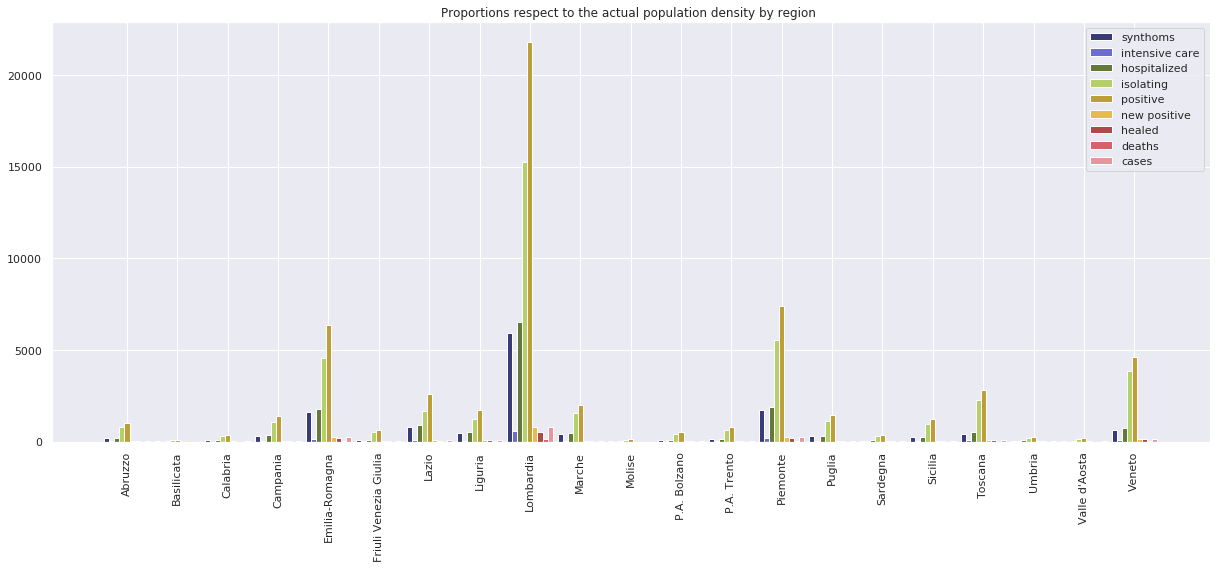

In [279]:
labels = df_divided_by_pop.index

x = np.arange(0, 21*10, step = 10)  # the label locations

fig, ax = plt.subplots(figsize=(17,8))

ax.bar(x-4, df_reg_counts['ricoverati_con_sintomi'], width=1, label='synthoms', color = sns.color_palette("tab20b")[0])
ax.bar(x-3, df_reg_counts['terapia_intensiva'], width=1, label='intensive care', color = sns.color_palette("tab20b")[2])     
ax.bar(x-2, df_reg_counts['totale_ospedalizzati'], width=1, label='hospitalized', color = sns.color_palette("tab20b")[4])   
ax.bar(x-1, df_reg_counts['isolamento_domiciliare'], width=1, label='isolating', color = sns.color_palette("tab20b")[6])
ax.bar(x, df_reg_counts['totale_positivi'], width=1, label='positive', color = sns.color_palette("tab20b")[9])
ax.bar(x+1, df_reg_counts['nuovi_positivi'], width=1, label='new positive', color = sns.color_palette("tab20b")[10])
ax.bar(x+2, df_reg_counts['dimessi_guariti_daily'], width=1, label='healed', color = sns.color_palette("tab20b")[13])
ax.bar(x+3, df_reg_counts['deceduti_daily'], width=1, label='deaths', color = sns.color_palette("tab20b")[14])
ax.bar(x+4, df_reg_counts['totale_casi_daily'], width=1, label='cases', color = sns.color_palette("tab20b")[15])  

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Proportions respect to the actual population density by region ')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show(); # click twice to zoom

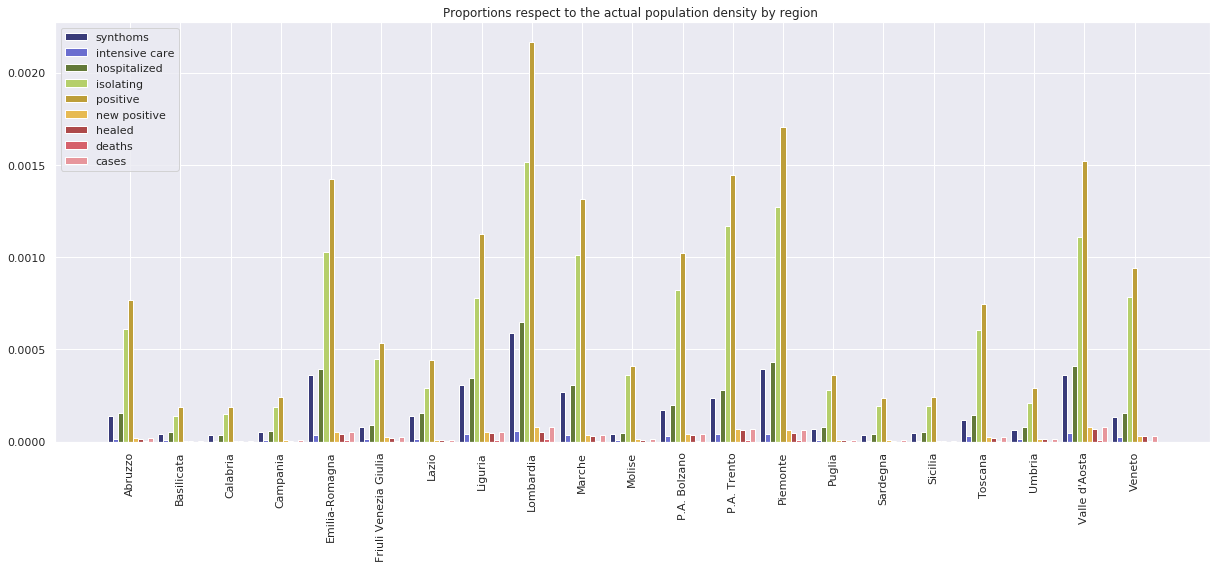

In [280]:
labels = df_divided_by_pop.index

x = np.arange(0, 21*10, step = 10)  # the label locations

fig, ax = plt.subplots(figsize=(17,8))

ax.bar(x-4, df_divided_by_pop['ricoverati_con_sintomi'], width=1, label='synthoms', color = sns.color_palette("tab20b")[0])
ax.bar(x-3, df_divided_by_pop['terapia_intensiva'], width=1, label='intensive care', color = sns.color_palette("tab20b")[2])     
ax.bar(x-2, df_divided_by_pop['totale_ospedalizzati'], width=1, label='hospitalized', color = sns.color_palette("tab20b")[4])   
ax.bar(x-1, df_divided_by_pop['isolamento_domiciliare'], width=1, label='isolating', color = sns.color_palette("tab20b")[6])
ax.bar(x, df_divided_by_pop['totale_positivi'], width=1, label='positive', color = sns.color_palette("tab20b")[9])
ax.bar(x+1, df_divided_by_pop['nuovi_positivi'], width=1, label='new positive', color = sns.color_palette("tab20b")[10])
ax.bar(x+2, df_divided_by_pop['dimessi_guariti_daily'], width=1, label='healed', color = sns.color_palette("tab20b")[13])
ax.bar(x+3, df_divided_by_pop['deceduti_daily'], width=1, label='deaths', color = sns.color_palette("tab20b")[14])
ax.bar(x+4, df_divided_by_pop['totale_casi_daily'], width=1, label='cases', color = sns.color_palette("tab20b")[15])  

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Proportions respect to the actual population density by region ')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show(); # click twice to zoom

If we look at the raw numbers for each region (first plot) we see that only Lombardy, Piedmont, Emilia-Romagna and Veneto, which are the most populated regions of north Itlay, have the highest numbers. Instead if we look at the proportion of cases in relation to the population, we see that also smaller regions reach high values. In fact we find that Liguria, Valle d'Aosta, Marche, Trento and Bolzano have high numbers.

Let's see for each variable the counts in relation to the total population. 

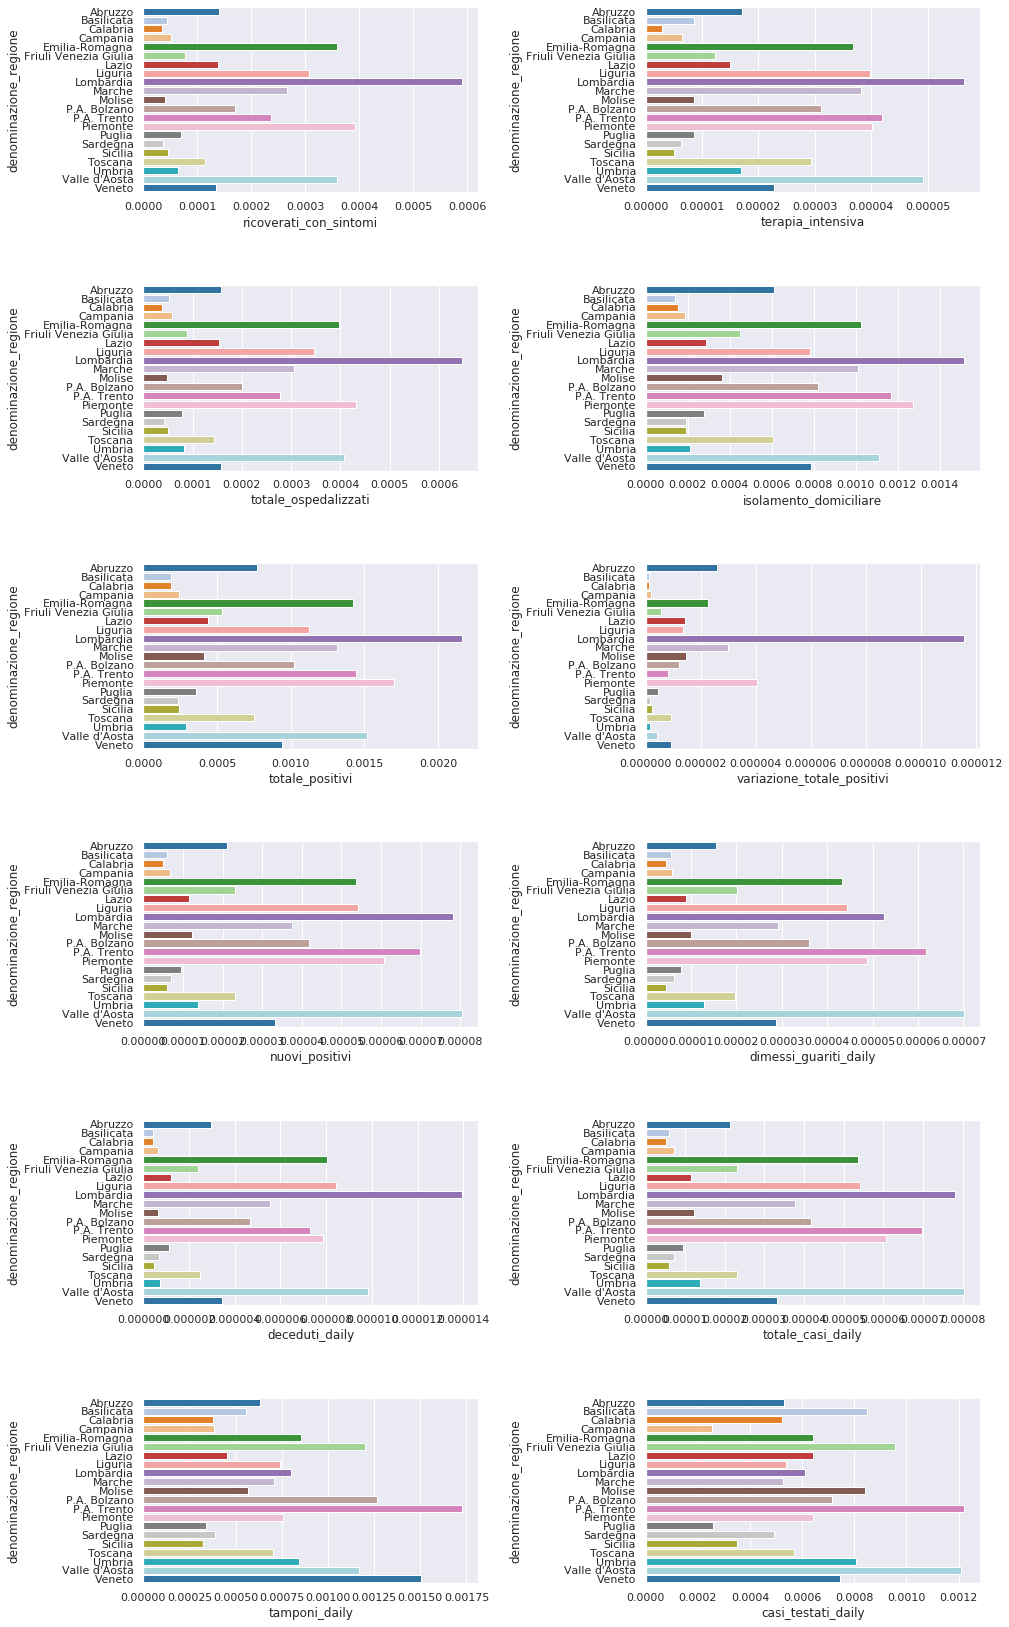

In [281]:
source_data = pd.DataFrame(df_divided_by_pop).reset_index()

plt.subplots(6, 2, figsize=(15,29))
the_grid = plt.GridSpec(6, 2, wspace=0.5, hspace=0.5)
k = 0
for i in range(6):
    for j in range(2):
        plt.subplot(the_grid[i, j])
        sns.barplot(x=df_divided_by_pop.columns[k], y='denominazione_regione', data=source_data, palette='tab20')
        k += 1

Looking at the proportions related with the region population, Lombardia seems to have the highest values for the number of cases and consequent variables. The number of swabs by population is high for almost all the north regions but Lombardy, for which only the 0.075% of population has been tested daily. 

### Boxplots of each count

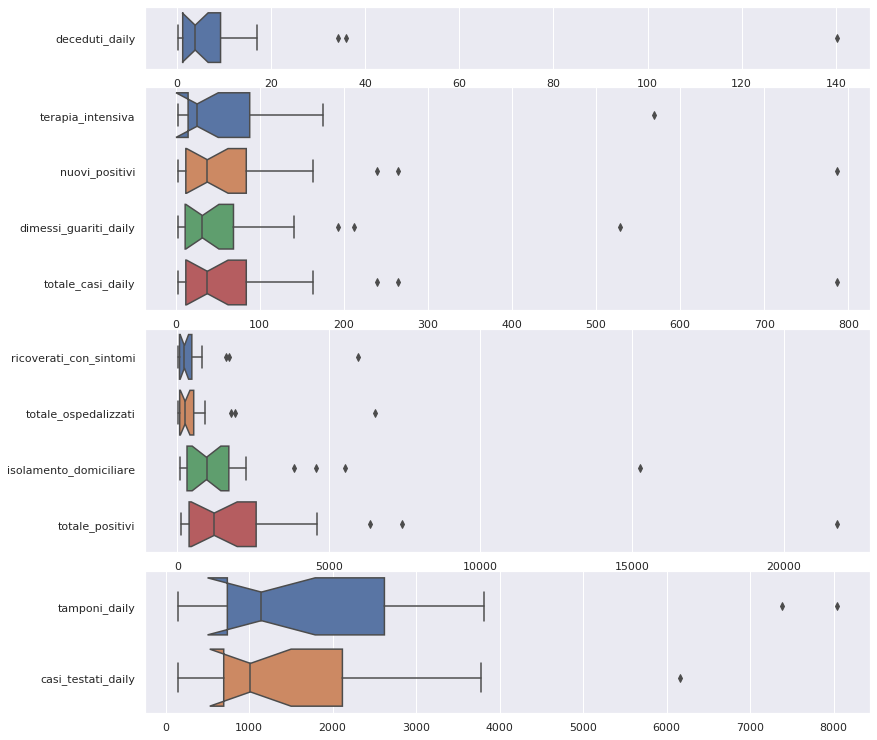

In [282]:
fig = plt.figure(figsize=(13, 13))
grid = plt.GridSpec(9, 4, wspace=0.4, hspace=0.3)

# boxplots for low values
low_val = plt.subplot(grid[1:4, :])
sns.boxplot(data=df_reg_counts[['terapia_intensiva', 'nuovi_positivi', 
                                'dimessi_guariti_daily', 'totale_casi_daily']], ax=low_val, 
            notch=True, orient='h')

# boxplots for medium-high
medium_low_val = plt.subplot(grid[4:7, :])
sns.boxplot(data=df_reg_counts[['ricoverati_con_sintomi', 'totale_ospedalizzati', 'isolamento_domiciliare',
                                   'totale_positivi']], ax=medium_low_val, notch=True, orient='h')

# boxplots for medium-low
medium_high_val = plt.subplot(grid[0, :])
sns.boxplot(data=df_reg_counts[['deceduti_daily']], ax=medium_high_val, notch=True, orient='h')

# boxplots for high
high_val = plt.subplot(grid[7:, :])
sns.boxplot(data=df_reg_counts[['tamponi_daily', 'casi_testati_daily']], ax=high_val, notch=True, orient='h');



This figure shows that the distributions are compressed on low values but there are a lot of ouliers, maybe related to the north areas.

The boxplots have been splitted into four plots to make them readable (they have different ranges and if put together some boxes resulted flat).

### Pie-plots of the contribution of every region

In [283]:
# new df including only some tallies
some_counts = pd.DataFrame(region.groupby('denominazione_regione')['ricoverati_con_sintomi', 'terapia_intensiva',
       'isolamento_domiciliare', 'totale_positivi',
       'dimessi_guariti_daily','deceduti_daily', 'totale_casi_daily', 'tamponi_daily'].mean())

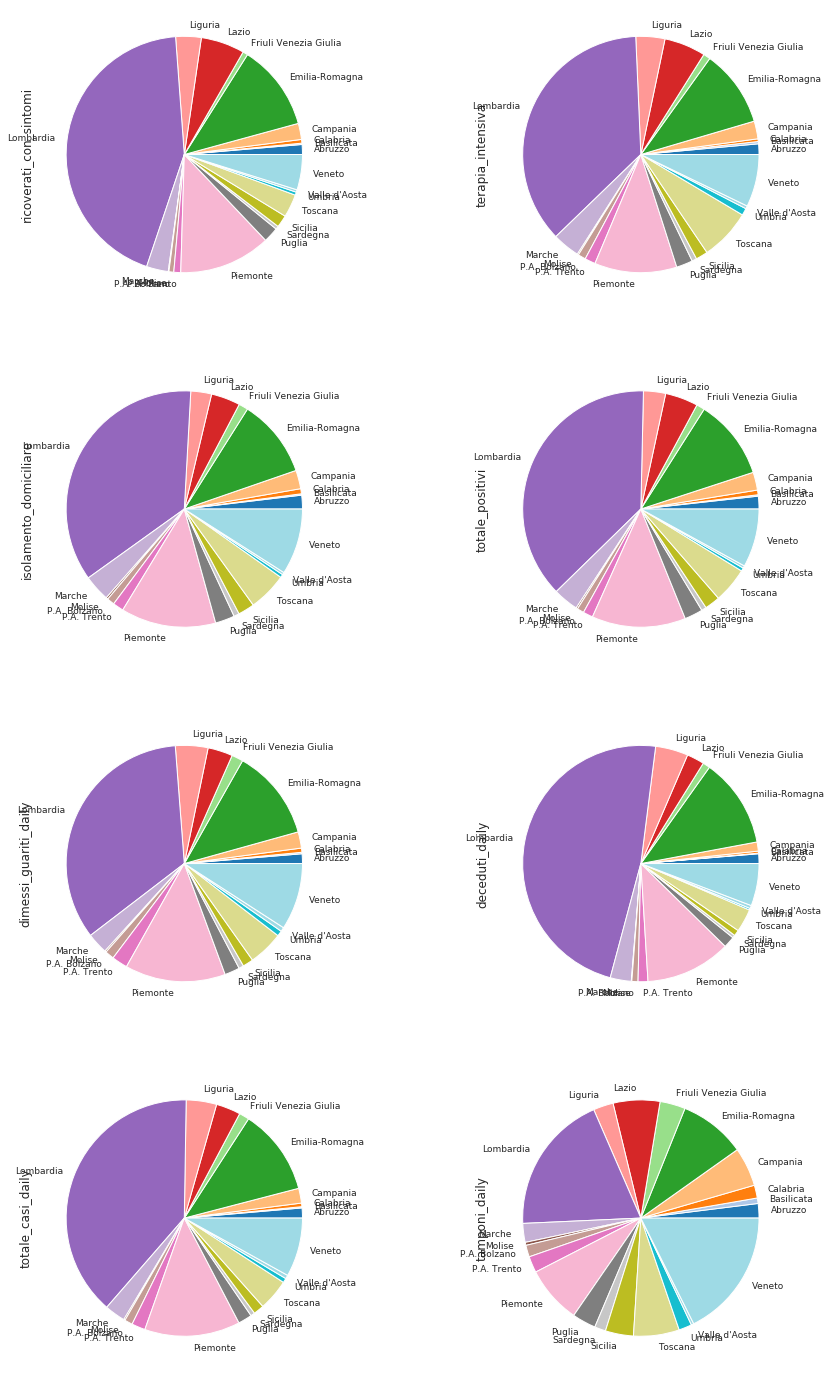

In [284]:
fig, axs = plt.subplots(4, 2)
columns = some_counts.columns
var = 0
for row in range(4):
    for col in range(2):
        some_counts[columns[var]].plot.pie(figsize=(15,25), legend=False, colormap = "tab20", 
                                           ax=axs[row, col], fontsize=9);
        var += 1

In every pie plot comes out that Lombardy is the italian region that the most has been dameged by Covid-19.
The majority of hospitalized, deaths and positive cases have been registred in Lombardy with a huge difference from the other regions. 

Instead, the number of swabs is more balanced between regions. Veneto seems to have the same number of swabs as the Lombardy.

-----------
## Merging the two data sets
In order to make the analysis more interesting, we can merge the two datasets (regions and province) to build one hierarchical DataFrame.

In [285]:
# selecting variables from 'province' dataset
cols_prov = ['codice_provincia', 'data', 'denominazione_provincia', 
             'denominazione_regione', 'lat', 'long', 'sigla_provincia', 'Popolazione', 'totale_casi', 'totale_casi_daily']   
# merging the datasets
merged = pd.merge(province_pop[cols_prov], region, on = ['denominazione_regione', 'data'], 
                  suffixes = ["_prov", "_reg"])                                     
# creating hierachical indexes
merged.set_index(['denominazione_regione', 'sigla_provincia', 'data'], inplace=True) 
merged.head()

codice_provincia  \
denominazione_regione sigla_provincia data                           
Abruzzo               CH              2020-02-24                69   
                      AQ              2020-02-24                66   
                      PE              2020-02-24                68   
                      TE              2020-02-24                67   
                      CH              2020-02-25                69   

                                                 denominazione_provincia  \
denominazione_regione sigla_provincia data                                 
Abruzzo               CH              2020-02-24                  Chieti   
                      AQ              2020-02-24                L'Aquila   
                      PE              2020-02-24                 Pescara   
                      TE              2020-02-24                  Teramo   
                      CH              2020-02-25                  Chieti   

                                                   lat_prov  long_prov  \
denominazione_regione sigla_provincia data                               
Abruzzo               CH              2020-02-24  42.351032  14.167546   
                      AQ              2020-02-24  42.351222  13.398438   
                      PE              2020-02-24  42.464584  14.213648   
                      TE              2020-02-24  42.658918  13.704400   
                      CH              2020-02-25  42.351032  14.167546   

                                                  Popolazione_prov  \
denominazione_regione sigla_provincia data                           
Abruzzo               CH              2020-02-24            385588   
                      AQ              2020-02-24            299031   
                      PE              2020-02-24            318909   
                      TE              2020-02-24            308052   
                      CH              2020-02-25            385588   

                                                  totale_casi_prov  \
denominazione_regione sigla_provincia data                           
Abruzzo               CH              2020-02-24                 0   
                      AQ              2020-02-24                 0   
                      PE              2020-02-24                 0   
                      TE              2020-02-24                 0   
                      CH              2020-02-25                 0   

                                                  totale_casi_daily_prov  \
denominazione_regione sigla_provincia data                                 
Abruzzo               CH              2020-02-24                       0   
                      AQ              2020-02-24                       0   
                      PE              2020-02-24                       0   
                      TE              2020-02-24                       0   
                      CH              2020-02-25                       0   

                                                 stato  codice_regione  \
denominazione_regione sigla_provincia data                               
Abruzzo               CH              2020-02-24   ITA              13   
                      AQ              2020-02-24   ITA              13   
                      PE              2020-02-24   ITA              13   
                      TE              2020-02-24   ITA              13   
                      CH              2020-02-25   ITA              13   

                                                    lat_reg  ...  tamponi  \
denominazione_regione sigla_provincia data                   ...            
Abruzzo               CH              2020-02-24  42.351222  ...        5   
                      AQ              2020-02-24  42.351222  ...        5   
                      PE              2020-02-24  42.351222  ...        5   
                      TE              2020-02-24  42.351222  ...        5   
           

In [286]:
# setting multiIndex sorted by date
merged.sort_index(inplace=True)      
merged.head()

codice_provincia  \
denominazione_regione sigla_provincia data                           
Abruzzo               AQ              2020-02-24                66   
                                      2020-02-25                66   
                                      2020-02-26                66   
                                      2020-02-27                66   
                                      2020-02-28                66   

                                                 denominazione_provincia  \
denominazione_regione sigla_provincia data                                 
Abruzzo               AQ              2020-02-24                L'Aquila   
                                      2020-02-25                L'Aquila   
                                      2020-02-26                L'Aquila   
                                      2020-02-27                L'Aquila   
                                      2020-02-28                L'Aquila   

                                                   lat_prov  long_prov  \
denominazione_regione sigla_provincia data                               
Abruzzo               AQ              2020-02-24  42.351222  13.398438   
                                      2020-02-25  42.351222  13.398438   
                                      2020-02-26  42.351222  13.398438   
                                      2020-02-27  42.351222  13.398438   
                                      2020-02-28  42.351222  13.398438   

                                                  Popolazione_prov  \
denominazione_regione sigla_provincia data                           
Abruzzo               AQ              2020-02-24            299031   
                                      2020-02-25            299031   
                                      2020-02-26            299031   
                                      2020-02-27            299031   
                                      2020-02-28            299031   

                                                  totale_casi_prov  \
denominazione_regione sigla_provincia data                           
Abruzzo               AQ              2020-02-24                 0   
                                      2020-02-25                 0   
                                      2020-02-26                 0   
                                      2020-02-27                 0   
                                      2020-02-28                 0   

                                                  totale_casi_daily_prov  \
denominazione_regione sigla_provincia data                                 
Abruzzo               AQ              2020-02-24                       0   
                                      2020-02-25                       0   
                                      2020-02-26                       0   
                                      2020-02-27                       0   
                                      2020-02-28                       0   

                                                 stato  codice_regione  \
denominazione_regione sigla_provincia data                               
Abruzzo               AQ              2020-02-24   ITA              13   
                                      2020-02-25   ITA              13   
                                      2020-02-26   ITA              13   
                                      2020-02-27   ITA              13   
                                      2020-02-28   ITA              13   

                                                    lat_reg  ...  tamponi  \
denominazione_regione sigla_provincia data                   ...            
Abruzzo               AQ              2020-02-24  42.351222  ...        5   
                                      2020-02-25  42.351222  ...        5   
                                      2020-02-26  42.351222  ...       13   
                                      2020-02-27  42.351222  ...       33   
           

In [287]:
display(merged.shape, merged.columns)  # new variables

(12626, 31)

Index(['codice_provincia', 'denominazione_provincia', 'lat_prov', 'long_prov',
       'Popolazione_prov', 'totale_casi_prov', 'totale_casi_daily_prov',
       'stato', 'codice_regione', 'lat_reg', 'long_reg',
       'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati',
       'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi_reg', 'tamponi', 'casi_testati', 'note_it',
       'note_en', 'dimessi_guariti_daily', 'deceduti_daily',
       'totale_casi_daily_reg', 'tamponi_daily', 'casi_testati_daily',
       'Popolazione_reg'],
      dtype='object')

The new merged dataset is composed by 12 626 rows and 30 variables.
- Row number = max(region, province) = 12626;
- Column number = 9 (selected by province) + 26 (columns of region) - 2 (mergedby) - 3 (set as indexes) = 30

### Italian scatterplot of cases
Let's use the latitude and longitude.

In [288]:
# select only latitude and longitude
df_1 = merged.groupby('denominazione_provincia')['lat_prov', 'long_prov']
df_1.head()

lat_prov  long_prov
denominazione_regione sigla_provincia data                            
Abruzzo               AQ              2020-02-24  42.351222  13.398438
                                      2020-02-25  42.351222  13.398438
                                      2020-02-26  42.351222  13.398438
                                      2020-02-27  42.351222  13.398438
                                      2020-02-28  42.351222  13.398438
...                                                     ...        ...
Veneto                VR              2020-02-24  45.438390  10.993527
                                      2020-02-25  45.438390  10.993527
                                      2020-02-26  45.438390  10.993527
                                      2020-02-27  45.438390  10.993527
                                      2020-02-28  45.438390  10.993527

[535 rows x 2 columns]

In [289]:
# build an aggregated dataset in which we consider also the latitude and longitude
df_counts_merged = pd.DataFrame(merged.groupby('sigla_provincia')['ricoverati_con_sintomi', 'terapia_intensiva',
                       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi', 
                       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti_daily', 
                       'deceduti_daily', 'totale_casi_daily_reg','totale_casi_daily_prov', 'tamponi_daily', 'casi_testati_daily', 
                       'lat_prov', 'long_prov', 'Popolazione_reg', 'Popolazione_prov'].mean())

# add the variable cases density
df_counts_merged['casi_su_popolazione_reg'] = df_counts_merged['totale_casi_daily_reg']/df_counts_merged['Popolazione_reg'] 
df_counts_merged['casi_su_popolazione_prov'] = df_counts_merged['totale_casi_daily_prov']/df_counts_merged['Popolazione_prov'] 

df_counts_merged.head()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti_daily,deceduti_daily,totale_casi_daily_reg,totale_casi_daily_prov,tamponi_daily,casi_testati_daily,lat_prov,long_prov,Popolazione_reg,Popolazione_prov,casi_su_popolazione_reg,casi_su_popolazione_prov
sigla_provincia,,,,,,,,,,,,,,,,,,,
AG,229.364407,25.644068,255.008475,959.779661,1214.788136,1.186441,29.381356,22.457627,2.372881,29.355932,1.194915,1609.644068,1744.741935,37.309711,13.584575,4999891.0,434870.0,0.000006,0.000003
AL,1708.711864,175.161017,1883.872881,5540.076271,7423.949153,17.669492,264.533898,212.559322,34.279661,264.533898,34.288136,3285.703390,2795.274194,44.912974,8.615401,4356406.0,421284.0,0.000061,0.000081
AN,406.822034,58.305085,465.127119,1543.262712,2008.389831,4.567797,57.355932,44.364407,8.449153,57.355932,15.898305,1080.084746,801.258065,43.616760,13.518875,1525271.0,471228.0,0.000038,0.000034
AO,45.127119,6.169492,51.296610,139.533898,190.830508,0.050847,10.110169,8.822034,1.237288,10.110169,10.110169,146.584746,152.129032,45.737503,7.320149,125666.0,125666.0,0.000080,0.000080
AP,406.822034,58.305085,465.127119,1543.262712,2008.389831,4.567797,57.355932,44.364407,8.449153,57.355932,2.457627,1080.084746,801.258065,42.853223,13.576911,1525271.0,207179.0,0.000038,0.000012


#### Scatter plot of number of cases using latitude and longitude as axes

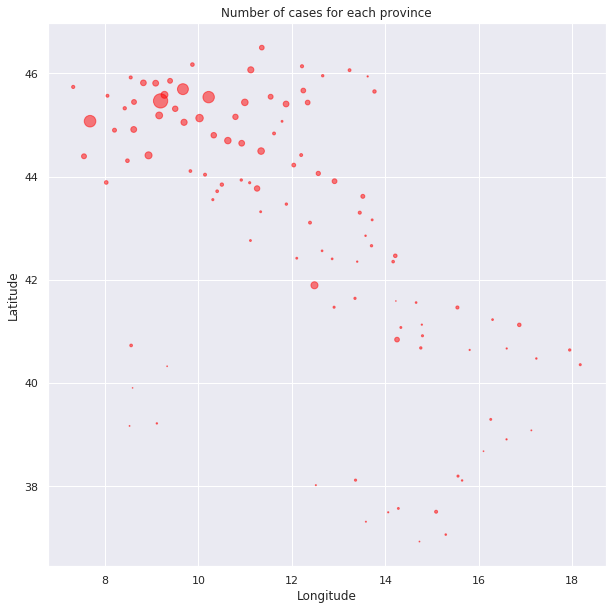

In [290]:
lat = df_counts_merged['lat_prov']                 # y position of points
long = df_counts_merged['long_prov']               # x position of points
dim = df_counts_merged['totale_casi_daily_prov']   # dimension of points

fig, axs = plt.subplots(figsize=(10, 10))

axs.scatter(long, lat, s=dim, alpha=0.5, color='red')

axs.set_xlabel("Longitude")
axs.set_ylabel("Latitude")
axs.set_title('Number of cases for each province');

#### Let's add Italy border

In [291]:
import requests

zipconfini="http://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012018.zip"
r = requests.get(zipconfini)

In [292]:
import zipfile
import io
import os

# it create a folder in which we can find all the borderd of Italy 
# (We can choose to take only the division by north-centre-south, regions, provinces or municipalities)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [293]:
# we take the borders of provinces
import geopandas as gpd

province_border = gpd.read_file("Limiti01012018/ProvCM01012018/ProvCM01012018_WGS84.shx")
province_border.head(2)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,DEN_PROV,DEN_CM,DEN_PCM,SIGLA,SHAPE_LENG,SHAPE_AREA,SHAPE_LEN,geometry
0,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,2.081602e+09,458754.447958,"POLYGON ((437900.551 5088796.203, 437915.020 5..."
1,4,15,63,263,263,-,Napoli,Napoli,NA,491263.499868,1.178935e+09,491263.499868,"MULTIPOLYGON (((935240.177 4530273.402, 935241..."


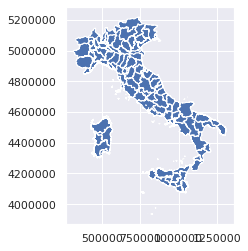

In [294]:
import geoplot

province_border.plot();

X and Y axes are not latitude and longitude.
It is necessary to change X and Y reference to make it compatible with our dataset.

In [295]:
province_border.crs        

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 6°E to 12°E - by country
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [296]:
province_border = province_border.to_crs("EPSG:4326")    # change reference
province_border.crs                                      # now X is longitude and Y is latitude

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

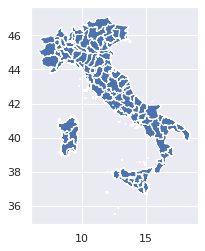

In [297]:
province_border.plot();  

#### We add the the total cases and number of swabs (daily)

In [298]:
counted = df_counts_merged.reset_index()
cases_by_province = pd.merge(province_border, counted, left_on='SIGLA', right_on='sigla_provincia')

cases_by_province['casi_test_su_pop_prov'] = cases_by_province['totale_casi_daily_prov'] / cases_by_province['Popolazione_prov']
cases_by_province['tamponi_test_su_pop_reg'] = cases_by_province['tamponi_daily'] / cases_by_province['Popolazione_reg']
cases_by_province['casi_su_tamponi_reg'] = cases_by_province['totale_casi_daily_reg'] / cases_by_province['tamponi_daily']
cases_by_province.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,DEN_PROV,DEN_CM,DEN_PCM,SIGLA,SHAPE_LENG,...,casi_testati_daily,lat_prov,long_prov,Popolazione_reg,Popolazione_prov,casi_su_popolazione_reg,casi_su_popolazione_prov,casi_test_su_pop_prov,tamponi_test_su_pop_reg,casi_su_tamponi_reg
0,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,...,2795.274194,45.323981,8.423234,4356406.0,170911.0,0.000061,0.000065,0.000065,0.000754,0.080511
1,4,15,63,263,263,-,Napoli,Napoli,NA,491263.499868,...,1474.258065,40.839566,14.250850,5801692.0,3084890.0,0.000007,0.000007,0.000007,0.000385,0.018353
2,2,8,40,0,40,Forli'-Cesena,-,Forli'-Cesena,FC,285062.577704,...,2859.451613,44.222686,12.040686,4459477.0,394627.0,0.000054,0.000037,0.000037,0.000854,0.062716
3,4,18,79,0,79,Catanzaro,-,Catanzaro,CZ,360558.844634,...,1016.241935,38.905976,16.594402,1947131.0,358316.0,0.000005,0.000005,0.000005,0.000380,0.013369
4,4,16,75,0,75,Lecce,-,Lecce,LE,360941.246566,...,1035.483871,40.353543,18.171897,4029053.0,795134.0,0.000010,0.000006,0.000006,0.000338,0.028165


#### The same scatter plot as before but with italian map using the dots

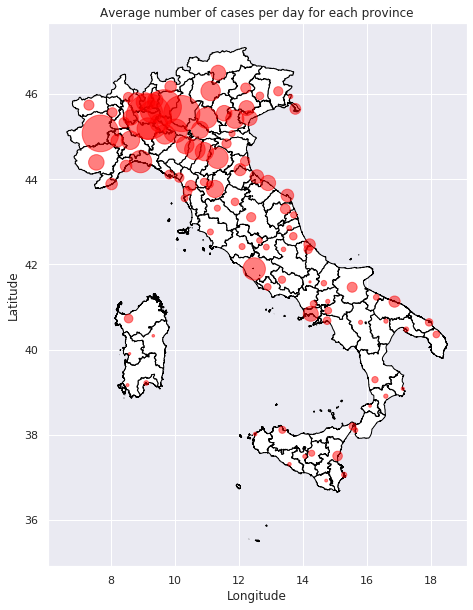

In [299]:
lat = cases_by_province['lat_prov']                  # y position of points
long = cases_by_province['long_prov']                # x position of points
dim = cases_by_province['totale_casi_daily_prov']*10 # dimension of points

fig, axs = plt.subplots(figsize=(10, 10))

cases_by_province.plot(color='white', edgecolor='black', figsize=(10, 10), ax=axs) # italan map
axs.scatter(long, lat, s=dim, alpha=0.5, color='red')                              # dots

axs.set_xlabel("Longitude")
axs.set_ylabel("Latitude")
axs.set_title('Average number of cases per day for each province');

#### Again the same scatter plot: now each dot is a case

In [300]:
# computing the average number of cases by province and turning into integer
cases = []
for c in cases_by_province['totale_casi_daily_prov']:
    cases.append(round(c, 0))

In [301]:
# building two arrays (lats and longs) repeating the geo-references by the same number 
# of average daily cases in that province
lats = []
longs = []
for i in range(len(cases_by_province['lat_prov'])):
    lats.append(np.repeat(cases_by_province['lat_prov'][i], cases[i]))
    longs.append(np.repeat(cases_by_province['long_prov'][i], cases[i]))
    
# converting the arrays into Series
lats = pd.Series(np.concatenate(lats, axis=0))
longs = pd.Series(np.concatenate(longs, axis=0))

In [302]:
from random import random

# building two arrays of the same length as lats and longs to randomly move a bit the dots 
shuffle1 = [(-1)**(round(random(),0))*random()*0.3 for i in range(len(lats))]
shuffle2 = [(-1)**(round(random(),0))*random()*0.3 for i in range(len(longs))]

# let's move the dots
lats_shuffled = lats + shuffle1
longs_shuffled =  longs + shuffle2

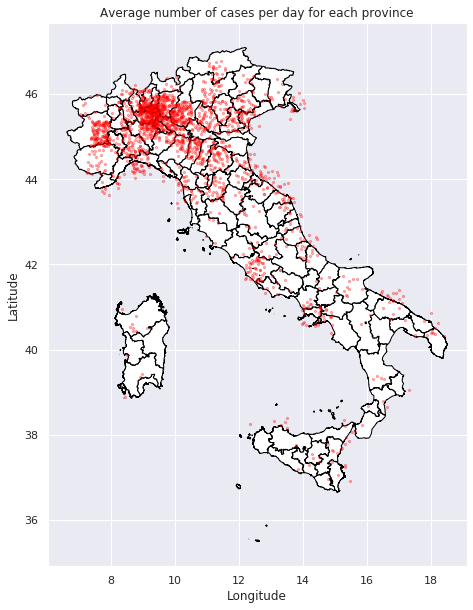

In [303]:
# Let's use the dots created so far to make the scatter-plot
fig, axs = plt.subplots(figsize=(10, 10))

cases_by_province.plot(color='white', edgecolor='black', figsize=(10, 10), ax=axs) # italan map
axs.scatter(longs_shuffled, lats_shuffled, alpha=0.3, color='red', s=5)                              # dots

axs.set_xlabel("Longitude")
axs.set_ylabel("Latitude")
axs.set_title('Average number of cases per day for each province');

The two plots above show the average number of daily cases by province in the italian map. In the first the size of each dot is proportional to the number of cases. In the second one every dot is a case.

Again these plots confirm that the majority of cases is located in the North-West, in particular in Lombardy.

#### Plot showing the number of swabs by province using color intensity

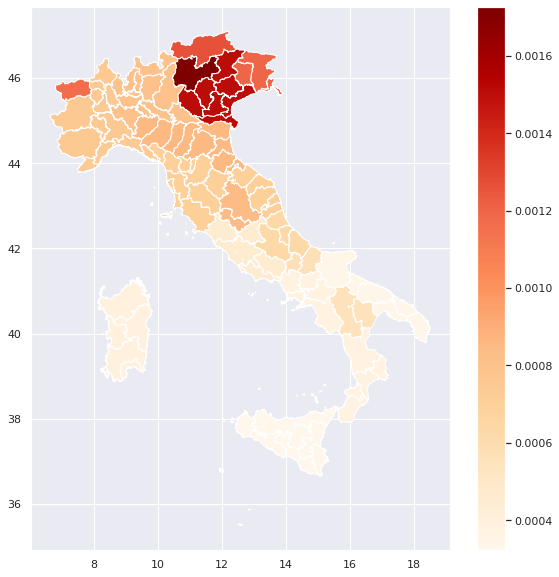

In [304]:
cases_by_province.plot(column='tamponi_test_su_pop_reg', cmap='OrRd', legend=True, figsize=(10,10));

The plot shows the average daily number of swabs by region divided by the number of inhabitants of the region. We use the province map because in the data Bolzano and Trento are treated as two regions distincted. 

From the figure we can see that the majority of the average number of swabs per person is in the North-East. Trento is the Autonomous Province with the highest ratio between swabs and inhabitants, followed by Veneto. 

#### Plot showing the ratio between the number of cases and the number of swabs by region

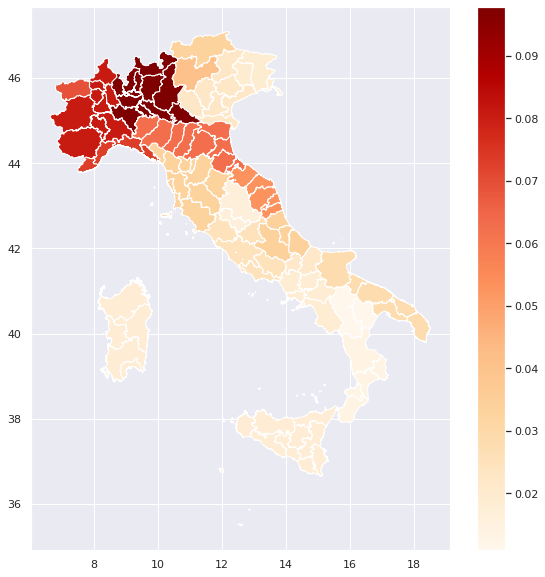

In [305]:
cases_by_province.plot(column='casi_su_tamponi_reg', cmap='OrRd', legend=True, figsize=(10,10));

The plot shows the ratio of the average of daily cases and the average of daily swabs for each region. A darker color indicates that in the region there is an higher number of cases with relation to the number of swabs on average. 

------------
## Pivot Tables

In [306]:
# Build months variable
mese = list(pd.DatetimeIndex(region['data']).month)                                # list of months numbers
monthsdic = {2: '2;February', 3: '3;March', 4: '4;April', 5:'5;May', 6:'6;June'}   # dict to link numbers and 
                                                                                   # names of months
mese = [monthsdic[n] for n in mese]                                               
region['month'] = mese

In [307]:
# Build geographical-area variable
zone = ['1;North-West', '2;North-East', '3;Center', '4;South', '5;Isles']          
areageodic = {'Abruzzo': zone[2], 'Basilicata': zone[3], 'Calabria': zone[3],    # dict to link regions 
              'Campania':zone[3], 'Emilia-Romagna':zone[1],                      # to their area
              'Friuli Venezia Giulia':zone[1], 'Lazio': zone[2], 
              'Liguria':zone[0], 'Lombardia':zone[0], 
              'Marche': zone[2], 'Molise':zone[3], 'P.A. Bolzano':zone[1], 
              'P.A. Trento':zone[1], 'Piemonte': zone[0], 'Puglia':zone[3],
              'Sardegna':zone[4], 'Sicilia':zone[4], 'Toscana': zone[2],
              'Umbria': zone[2], 'Valle d\'Aosta':zone[0], 
              'Veneto':zone[1]}

area_geografica = [ areageodic[n] for n in region.denominazione_regione ]
region['geographic_area'] = area_geografica

##### Average number of people in intensive care per day by month according to areas (North-West, North-East, Center, South, Islands).

In [308]:
# Pivot table
region.pivot_table('terapia_intensiva', index='geographic_area', columns='month', margins=True)

month,2;February,3;March,4;April,5;May,6;June,All
geographic_area,,,,,,
1;North-West,9.916667,271.604839,374.958333,113.806452,34.50000,202.932203
2;North-East,2.566667,85.219355,129.346667,36.058065,6.39000,65.959322
3;Center,0.233333,66.490323,115.613333,35.529032,14.18000,58.610169
4;South,0.000000,20.458065,35.426667,9.283871,2.01000,17.161017
5;Isles,0.000000,19.193548,36.850000,11.467742,2.90000,17.915254
All,2.555556,94.554531,141.688889,42.024578,12.22381,74.105327


The number of people in intensive care is higher in the North-West than the other areas.
It is critically high in the month of April. 

##### Average number of cases per day by month and by number of swabs according to areas (North-West, North-East, Center, South, Islands).

In [309]:
# building a variable for ranges of swabs based on percentiles (low, medium, high)
cut = np.percentile(region.tamponi_daily, [25, 75])

tamponi_cut = [0]*len(region['tamponi_daily'])
for i in range(len(region['tamponi_daily'])):
    if region['tamponi_daily'][i] <= cut[0]:
        tamponi_cut[i] = '1.low'
    elif region['tamponi_daily'][i] <= cut[1]:
        tamponi_cut[i] = '2.medium'
    else:
        tamponi_cut[i] = '3.high'
region['swabs_cut'] = tamponi_cut
region['swabs_cut'].sample(5)

483        1.low
1450      3.high
1571    2.medium
717        1.low
293     2.medium
Name: swabs_cut, dtype: object

In [310]:
region.pivot_table('totale_casi_daily', index='geographic_area', columns=['month', 'swabs_cut']) 

month           2;February                3;March                        \
swabs_cut            1.low    2.medium      1.low    2.medium    3.high   
geographic_area                                                           
1;North-West     10.800000  113.000000  36.017857  337.431818  1625.875   
2;North-East      7.304348   34.428571  53.444444  146.118421   541.560   
3;Center          1.034483    0.000000  32.000000  132.173333   220.000   
4;South           0.566667         NaN  10.117117   86.000000       NaN   
5;Isles           0.333333         NaN  13.948718   79.173913       NaN   

month              4;April                             5;May             \
swabs_cut            1.low    2.medium      3.high     1.low   2.medium   
geographic_area                                                           
1;North-West     18.576923  180.052632  844.000000  1.571429  41.435897   
2;North-East     30.000000   72.765432  293.876923       NaN   6.705128   
3;Center         38.222222   60.336957  135.408163  0.000000  10.718750   
4;South           5.710526   46.692308   33.875000  3.863636   5.534653   
5;Isles          13.000000   32.717391   49.818182  0.000000   4.489796   

month                          6;June                         
swabs_cut            3.high     1.low   2.medium      3.high  
geographic_area                                               
1;North-West     275.953125  0.450000  13.041667  122.055556  
2;North-East      47.584416  0.500000   1.269231   11.021739  
3;Center          30.381818  0.666667   2.403226    9.781250  
4;South           11.781250  0.263158   0.940299    1.000000  
5;Isles            9.833333       NaN   0.823529    1.000000

The number of cases is related with the number of swabs in each region and month. In the month of June for  approximatively the same amount of swabs, the number of cases is lower than in the other months.

### Time series

In [311]:
# building an array with the unique dates of the DataFrame
dates = merged.reset_index()['data'].unique()
dates[:5]

array(['2020-02-24T00:00:00.000000000', '2020-02-25T00:00:00.000000000',
       '2020-02-26T00:00:00.000000000', '2020-02-27T00:00:00.000000000',
       '2020-02-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [312]:
# building an array with the unique provinces of the DataFrame
prov = merged.reset_index()['sigla_provincia'].unique()
prov[:5]

array(['AQ', 'CH', 'PE', 'TE', 'MT'], dtype=object)

In [313]:
# Creating an empty TimeSeries
dates_TS = pd.DatetimeIndex(dates)
TS = pd.DataFrame(index = dates_TS, columns = prov)
TS.head()

,AQ,CH,PE,TE,MT,PZ,CS,CZ,KR,RC,...,PG,TR,AO,BL,PD,RO,TV,VE,VI,VR
2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
# filling the TimeSeries with the daily amount of cases by province
df = merged.reset_index()
for r in range(df.shape[0]):
    TS[df['sigla_provincia'][r]][df['data'][r]] = df['totale_casi_daily_prov'][r]
TS.head()

,AQ,CH,PE,TE,MT,PZ,CS,CZ,KR,RC,...,PG,TR,AO,BL,PD,RO,TV,VE,VI,VR
2020-02-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,30,0,1,7,0,0
2020-02-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,0,1,1,0,0
2020-02-27,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,19,0,20,6,3,0
2020-02-28,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,9,0,1,1,0,0


#### Let's use this new TimeSeries DataFrame to create a new set of plots

In [315]:
regs = merged.index.get_level_values('denominazione_regione').unique()
regs

Index(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
       'Sardegna', 'Sicilia', 'Toscana', 'Umbria', 'Valle d'Aosta', 'Veneto'],
      dtype='object', name='denominazione_regione')

In [316]:
# linking each region to own provinces
links = {}
for i in regs:
    links[i] = []
    for k in merged.loc[i].index.get_level_values('sigla_provincia').unique():
        links[i].append(k)
links

{'Abruzzo': ['AQ', 'CH', 'PE', 'TE'],
 'Basilicata': ['MT', 'PZ'],
 'Calabria': ['CS', 'CZ', 'KR', 'RC', 'VV'],
 'Campania': ['AV', 'BN', 'CE', 'NA', 'SA'],
 'Emilia-Romagna': ['BO', 'FC', 'FE', 'MO', 'PC', 'PR', 'RA', 'RE', 'RN'],
 'Friuli Venezia Giulia': ['GO', 'PN', 'TS', 'UD'],
 'Lazio': ['FR', 'LT', 'RI', 'RM', 'VT'],
 'Liguria': ['GE', 'IM', 'SP', 'SV'],
 'Lombardia': ['BG',
  'BS',
  'CO',
  'CR',
  'LC',
  'LO',
  'MB',
  'MI',
  'MN',
  'PV',
  'SO',
  'VA'],
 'Marche': ['AN', 'AP', 'FM', 'MC', 'PU'],
 'Molise': ['CB', 'IS'],
 'P.A. Bolzano': ['BZ'],
 'P.A. Trento': ['TN'],
 'Piemonte': ['AL', 'AT', 'BI', 'CN', 'NO', 'TO', 'VB', 'VC'],
 'Puglia': ['BA', 'BR', 'BT', 'FG', 'LE', 'TA'],
 'Sardegna': ['CA', 'NU', 'OR', 'SS', 'SU'],
 'Sicilia': ['AG', 'CL', 'CT', 'EN', 'ME', 'PA', 'RG', 'SR', 'TP'],
 'Toscana': ['AR', 'FI', 'GR', 'LI', 'LU', 'MS', 'PI', 'PO', 'PT', 'SI'],
 'Umbria': ['PG', 'TR'],
 "Valle d'Aosta": ['AO'],
 'Veneto': ['BL', 'PD', 'RO', 'TV', 'VE', 'VI', 'VR']}

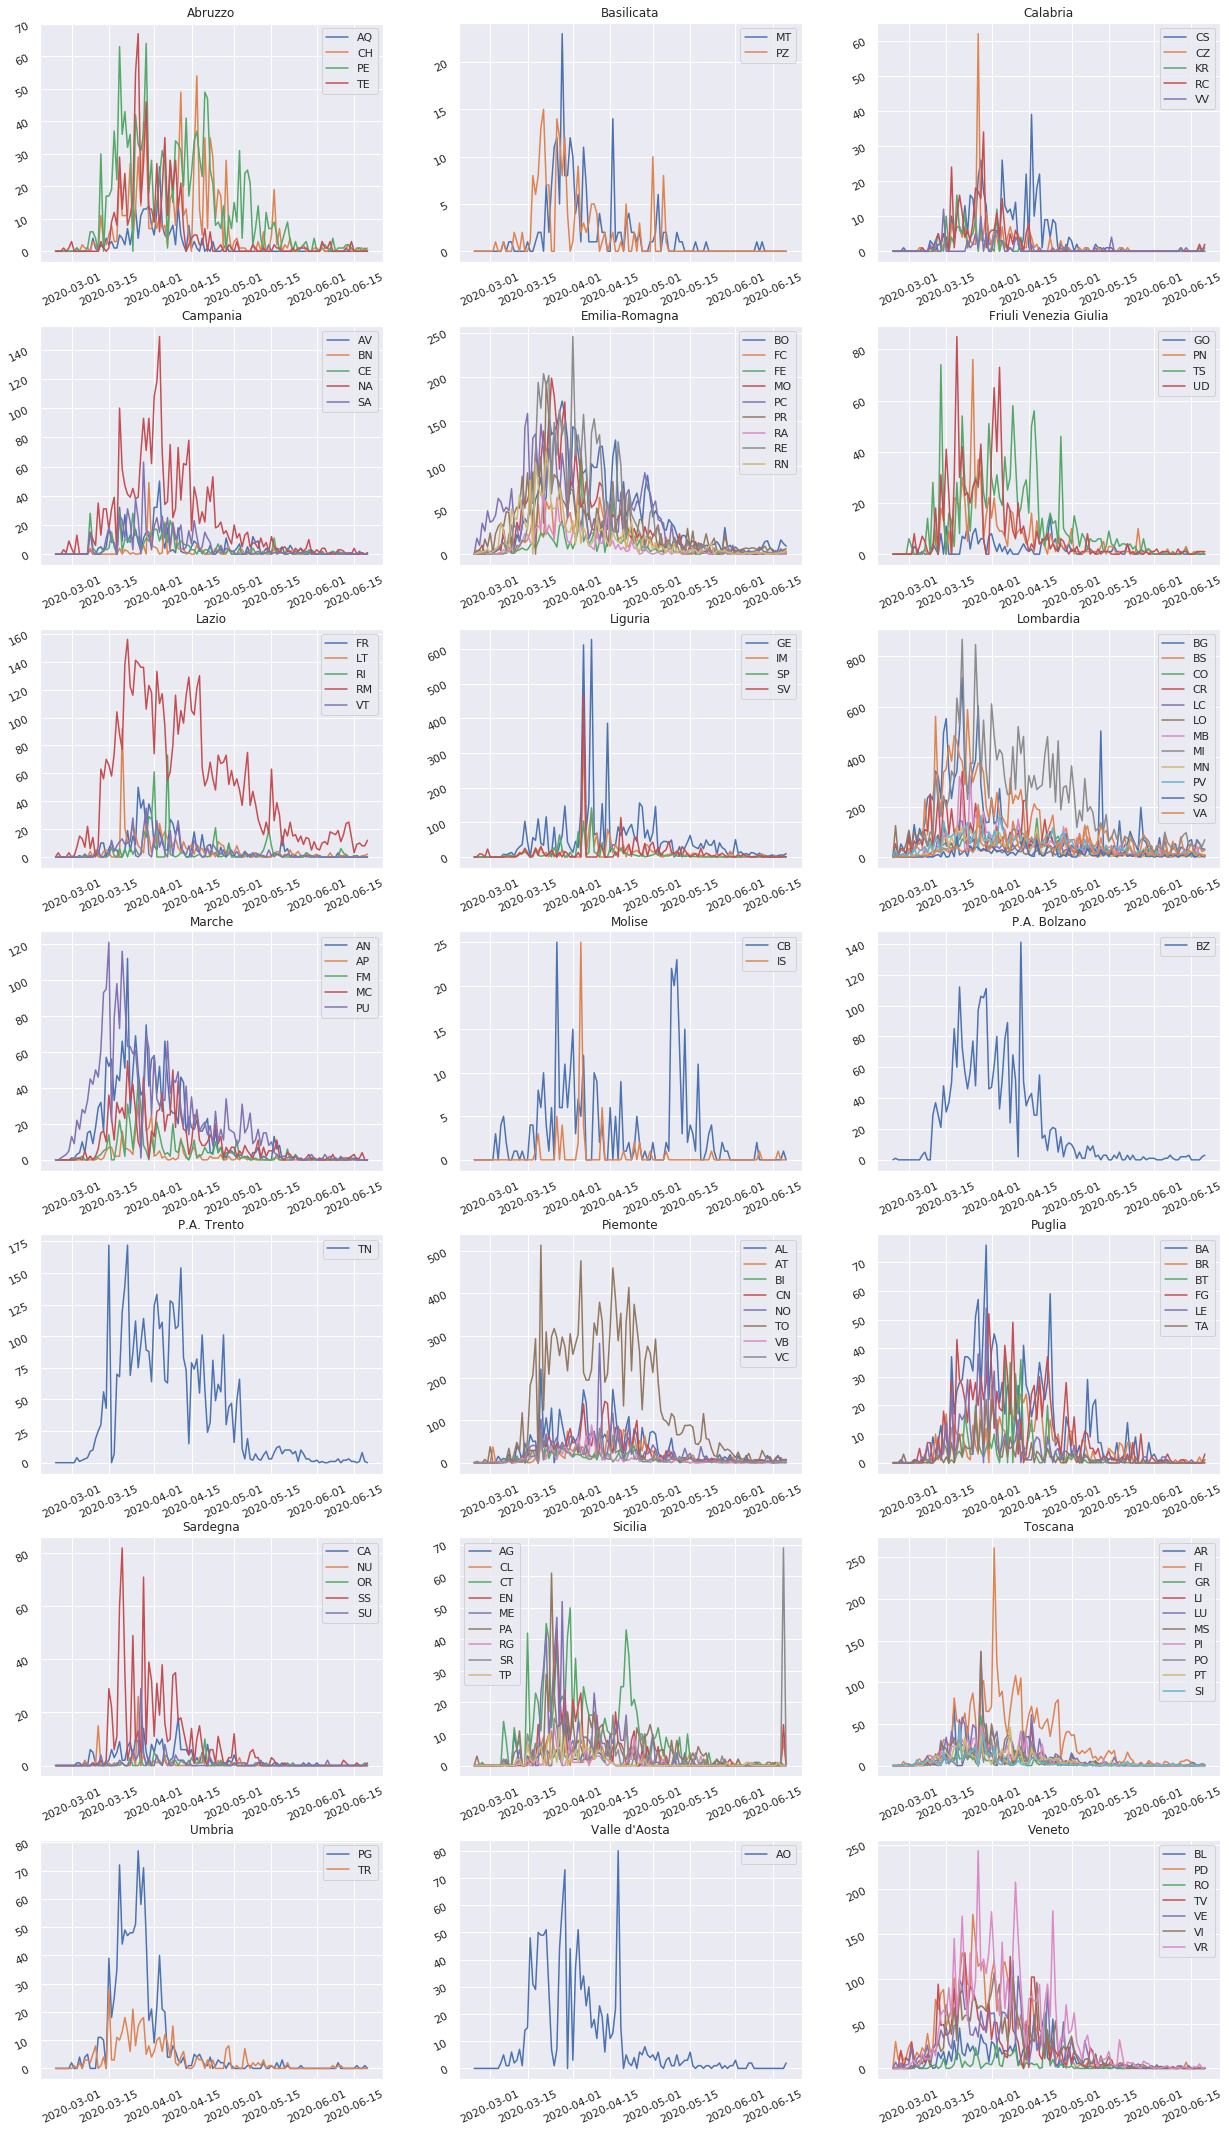

In [317]:
rows = 7
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(18, 30))
fig.tight_layout(pad=4.0)
reg = 0
for i in range(rows):
    for k in range(cols):
        axs[i, k].plot(TS[links[regs[reg]]], label=links[regs[reg]])
        axs[i, k].legend(links[regs[reg]])
        axs[i, k].set_title(regs[reg])
        axs[i, k].tick_params(labelrotation=25)
        reg +=1

The set of plots shows the TimeSeries of number of daily cases divided by region for each province. We can see that the highest peak of cases has been reached by Milan with more than 800 cases per day in March. 

In Genoa the peak has been reached at the beginning of April with more than 600 cases in a day.
Similar observations can be done for each province. 

#### Autocorrelation plot of Italy

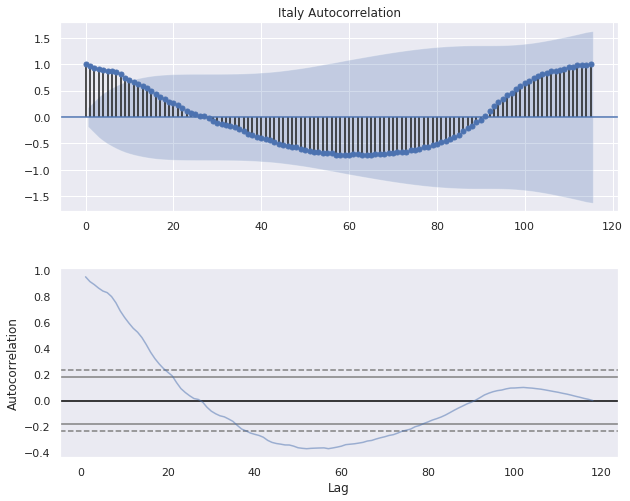

In [318]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot

fig = plt.figure(figsize=(10, 8))
grid = plt.GridSpec(2, 1, wspace=0.4, hspace=0.3)

#ACF plot for totals: denominator of autocovariance n-k
first = plt.subplot(grid[0, :])
plot_acf(TS.sum(axis = 1), lags=115, unbiased = True, title = 'Italy Autocorrelation', ax=first, alpha=0.05);

# denominator of autocovariance n
second = plt.subplot(grid[1, :])
autocorrelation_plot(TS.sum(axis = 1), ax=second, alpha=0.5);
# dashed 99%, continuos 95%

The first autocorrelation plot is computed using as denominator (n-k), where n is the number of total dates and k is the actual lag. The blue area is the confidence interval, which standard error is computed using the Bartlett's formula. The estimated variance (and consequently the dimension of the interval) increases with k.

The second autocorrelation plot is computed using as denominator n. The grey lines (dashed and countinuos) represent the confidence interval, which standard error is computed using the Bartlet's formula assuming no time-dependence. The estimated variance (and consequently the dimension of the interval) is now constant.

(For more info see https://en.wikipedia.org/wiki/Correlogram.)

**Interpretation**:
In the first 20 lags there is a positive but decreasing autocorrelation. Between the 40th and the 75th lag we see a negative autocorrelation. This means that if we compare two values that differ of 20 days or less, we expect to observe similar values, while if we compare two values that differ from 40 to 75 days, we expect very different values. 



--------
## Conclusion

After a little exploration of variables and rows of the DataFrame, it turn out to be necessary to trasform some cumulative variables (the ones that grow only) into frequencies. This step allowed us to compute more interpretable statistics and draw more interesting plots. 

With the same aim, we added data relative to the number of inhabitants per province. Using this information we discovered that the spread of SARS-CoV-2 and its consequences are similar in the regions of North Italy. 


Analysing the number of swabs, it came up that Lombardy has done fewer swabs per inhabitant than other northern regions, in particular Veneto and A.P. Trento. Furthermore looking at the ratio between average cases and average swabs per day, it emerged that Lombardy has the worst situation: almost 9% of swabs resulted positive. 
From this information we can imagine that if Lombardy had the same proportion of swabs on the number of inhabitants of Veneto, its average number of cases would be higher.

